# Basic MNIST with tf.contrib.learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [3]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [4]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

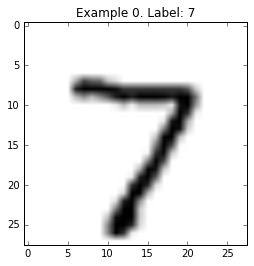

In [5]:
display(0)

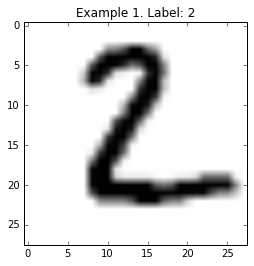

In [6]:
display(1)

These digits are clearly drawn. Here's one that's not.

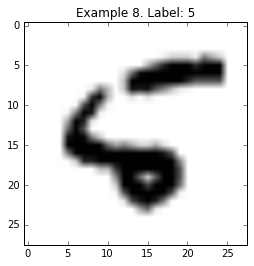

In [7]:
display(8)

Now let's take a look at how many features we have.

In [8]:
print len(data[0])

784


## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier.

In [9]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier()

## Evaluate accuracy

In [10]:
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

0.9141


## Classify a few examples

We can make predictions on individual images using the predict method

Predicted 7, Label: 7
Predicted 6, Label: 5


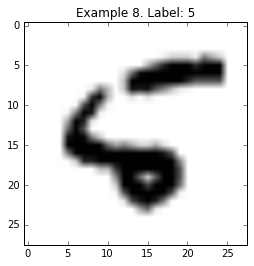

In [11]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Beginner's MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

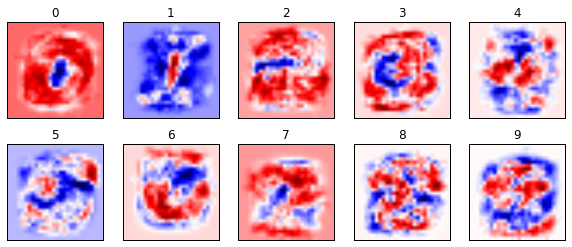

In [12]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

# Next steps

Tutorials
* http://tensorflow.org

Books
* http://neuralnetworksanddeeplearning.com
* http://www.deeplearningbook.org

Samples
* https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow